# A/B Testing Project

# Problem Statement

As a marketing Agency, our prrimary goal is to maximize return on investment (ROI) for out client advertinsing campaigns.we have conducted two add campaigns one on facebook and other on Adwords, and we have to determine which platform yeilds to better results in term of clicks, conversion and overall cost effectiveness. By identifying the most effective platform, We can allocate our rescources efficiently and optimize our advertinzing  strategies to deliver better outcomes to the client.

# Research Questoins

### Which ad platform is better in term of clicks, conversion and overall cost effectiveness?

# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import  coint
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv('Marketing_Campaign.csv')

In [3]:
# Data overview
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [4]:
# rows and columns count of the dataset
df.shape

(1000, 17)

In [5]:
df.dtypes

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object

In [6]:
# Converting date to datetime
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])

In [7]:
# descriptive stte of the campaign
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-04 07:13:26.399999744,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
min,2021-12-22 00:00:00,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,2022-10-07 18:00:00,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2023-07-20 12:00:00,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2024-03-24 00:00:00,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,2024-12-20 00:00:00,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000
std,NaN,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846


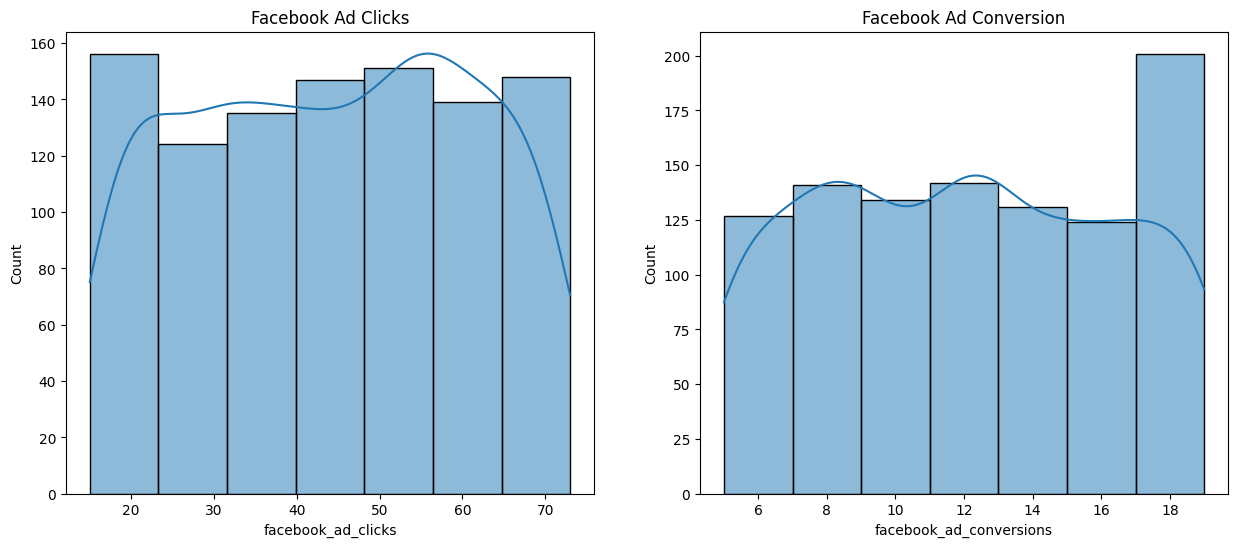

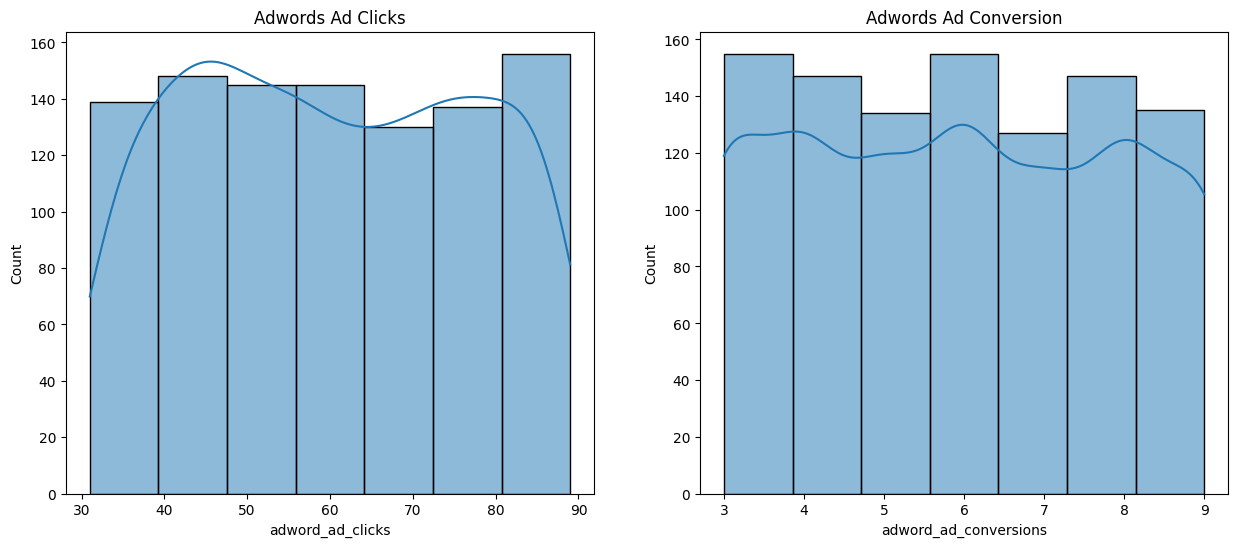

In [8]:
# Destribution of the clicks and conversion
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Clicks")
sns.histplot(df['facebook_ad_clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title("Facebook Ad Conversion")
sns.histplot(df['facebook_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Adwords Ad Clicks")
sns.histplot(df['adword_ad_clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title("Adwords Ad Conversion")
sns.histplot(df['adword_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

All the histgram showing somewhat symmetrical shape. This symmetrical shape suggest that the number of clicks and conversions is relatively evenly distributed. In other words there are not many clicks or conversions that are outliers on either the low or high end.




### How frequently do we observe days with high number of conversions compared with the low number of conversions?

In [9]:
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6-10')
        elif 11 <= conversion <16:
            category.append("10-15")
        else:
            category.append("more than 15")
    return category

df['facebook_conversion_category'] = create_conversion_category('facebook_ad_conversions')
df['adword_conversion_category'] = create_conversion_category('adword_ad_conversions')

In [10]:
df[['facebook_ad_conversions', 'facebook_conversion_category', 'adword_ad_conversions', 'adword_conversion_category']].head()

,facebook_ad_conversions,facebook_conversion_category,adword_ad_conversions,adword_conversion_category
0,14,10-15,9,6-10
1,9,6-10,6,6-10
2,15,10-15,9,6-10
3,9,6-10,3,less than 6
4,12,10-15,4,less than 6


In [11]:
df['facebook_conversion_category'].value_counts()

facebook_conversion_category
10-15           341
6-10            337
more than 15    257
less than 6      65
Name: count, dtype: int64

In [12]:
facebook = pd.DataFrame(df['facebook_conversion_category'].value_counts()).reset_index().rename(columns={'facebook_conversion_category': "Category"})
facebook

,Category,count
0,10-15,341
1,6-10,337
2,more than 15,257
3,less than 6,65


In [13]:
df['adword_conversion_category'].value_counts()

adword_conversion_category
6-10           564
less than 6    436
Name: count, dtype: int64

In [14]:
adwords = pd.DataFrame(df['adword_conversion_category'].value_counts()).reset_index().rename(columns={'adword_conversion_category': "Category"})
adwords

,Category,count
0,6-10,564
1,less than 6,436


In [15]:
# Merging Dataset
category_df = pd.merge(facebook, adwords, on='Category', how='outer').fillna(0).rename(columns={'count_x':'fc_conversion_count','count_y':'adword_conversion_count'})
category_df

,Category,fc_conversion_count,adword_conversion_count
0,10-15,341,0.0
1,6-10,337,564.0
2,more than 15,257,0.0
3,less than 6,65,436.0


In [16]:
# Arranging the dataframe
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,fc_conversion_count,adword_conversion_count
3,less than 6,65,436.0
1,6-10,337,564.0
0,10-15,341,0.0
2,more than 15,257,0.0


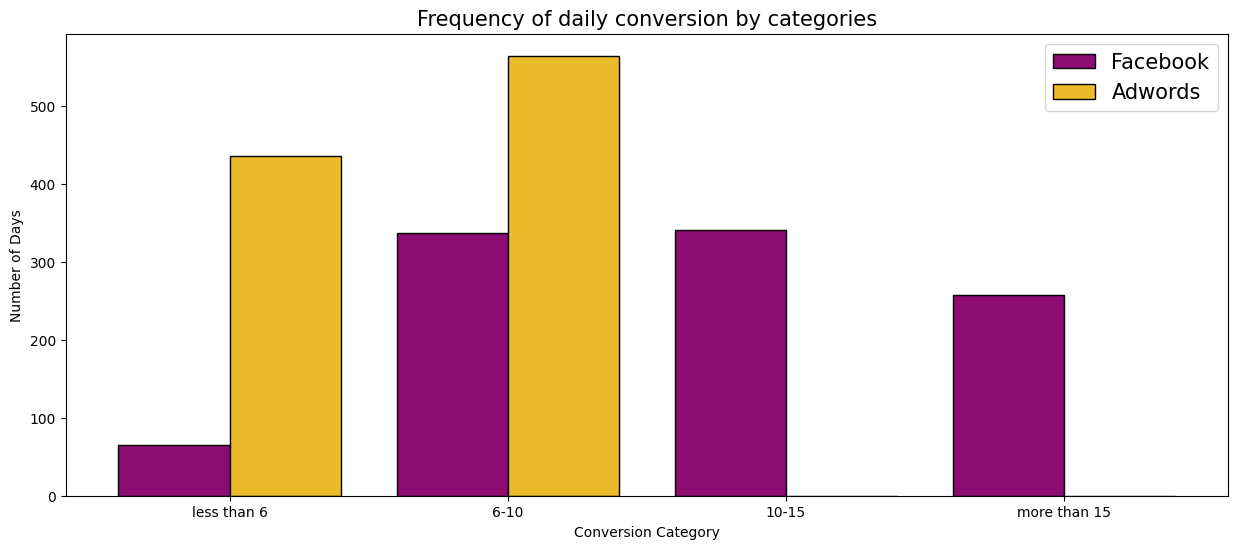

In [17]:
# Barplot Plotting
x_axis = np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(x_axis - 0.2, category_df['fc_conversion_count'],0.4, label='Facebook', color='#8c0c71',linewidth=1, edgecolor='k')
plt.bar(x_axis + 0.2, category_df['adword_conversion_count'],0.4, label='Adwords', color='#ebbb2b',linewidth=1, edgecolor='k')

plt.xticks(x_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title("Frequency of daily conversion by categories", fontsize=15)
plt.legend(fontsize=15)
plt.show()

* The Data suggest that Facebook had more frequent conversion days than AdWords, Which either has very low conversion rate (less than 6) or moderate ones (6-10).
* There is a significant variance in number of high conversion days between two different campaigns.
* the absence of any days with converion between 10-15 and more than 15 in AdWords indicates a need to review what strategies where changed or what external factors could have influenced these numbers.

### Do the more clicks on ads really lead to more sales?

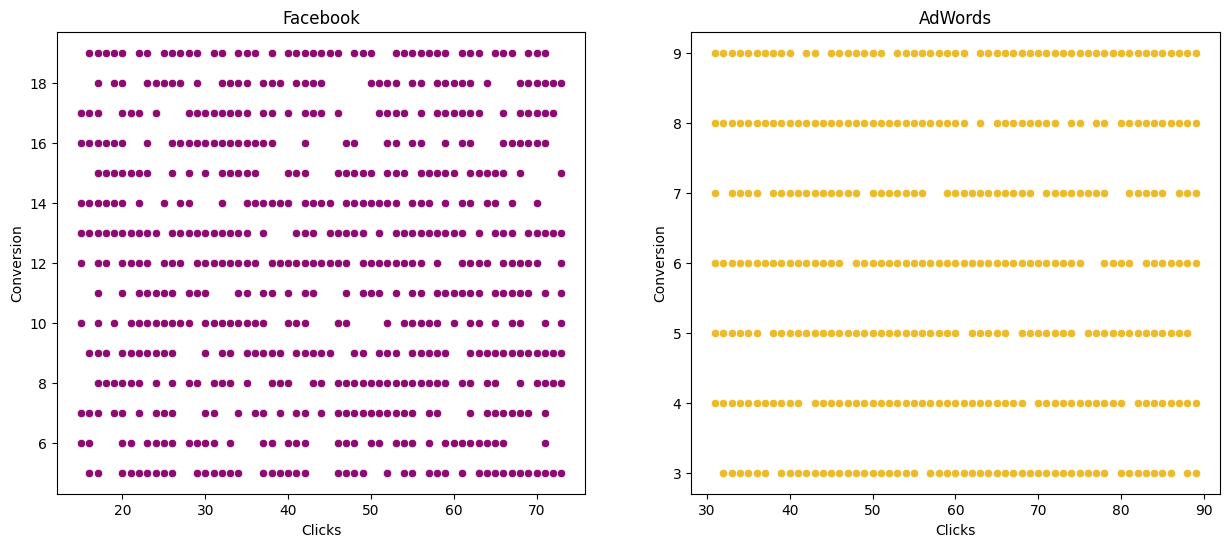

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#8c0c71')
plt.xlabel('Clicks')
plt.ylabel('Conversion')

plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x=df['adword_ad_clicks'], y=df['adword_ad_conversions'], color='#ebbb2b')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.show()

In [19]:
facebook_corr = df[['facebook_ad_conversions','facebook_ad_clicks']].corr()
facebook_corr

,facebook_ad_conversions,facebook_ad_clicks
facebook_ad_conversions,1.000000,-0.005009
facebook_ad_clicks,-0.005009,1.000000


In [20]:
adwords_corr = df[['adword_ad_conversions','adword_ad_clicks']].corr()
adwords_corr

,adword_ad_conversions,adword_ad_clicks
adword_ad_conversions,1.000000,0.004162
adword_ad_clicks,0.004162,1.000000


In [21]:
print(" correlation coef /n--------------------")
print("Facebook : ",round(facebook_corr.values[0,1],2))
print("AdWords : ",round(adwords_corr.values[0,1],2))

 correlation coef /n--------------------
Facebook :  -0.01
AdWords :  0.0


* The correlation coefficient of -0.01 indicates a very weak negative linear relationship between Facebook ad clicks and Facebook ad conversions.Practically, there is no meaningful relationship between the number of clicks and conversions for Facebook ads.

* The correlation coefficient of 0.0 shows no linear relationship between AdWords ad clicks and AdWords ad conversions.
#### Interpretation : 
Facebook:
* Practically, there is no meaningful relationship between the number of clicks and conversions for Facebook ads.A small decrease in conversions might occur as clicks increase, but the effect is so minimal (close to 0) that it’s likely due to random noise or other influencing factors.
*  This suggests that clicks alone are not driving conversions effectively on Facebook.Focus on improving the quality of your ad content, audience targeting, or landing page experience.

AdWords :
* Clicks on AdWords ads have no discernible impact on conversions.Conversions could depend on factors like ad relevance, bidding strategy, or user behavior after clicking the ad.
* Similar to Facebook, you should investigate additional factors influencing conversions, such as campaign targeting, keyword effectiveness, or landing page optimization.
* Similar to Facebook, you should investigate additional factors influencing conversions, such as campaign targeting, keyword effectiveness, or landing page optimization.

# Hypothesis Testing

**Hypothesis** : Advertinsing on facebook will result in greater number of conversions capare to advertisng on adwords.

**Null Hypothesis(H0)** : There is no difference in the conversion between facebook and AdWords or the number of conversions form AdWords are greater than or equal to thos from Facebook.

**Alternate Hypothesis(H1)** : The number of conversions form facebok is greater than the number of conversions from AdWords.

H1: $\mu$ _facebook > $\mu$ _adwprds

In [22]:
print("Mean Converson \n -----------------")
print("Facebook ", round(df['facebook_ad_conversions'].mean(),2))
print("AdWords ", round(df['adword_ad_conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a=df['facebook_ad_conversions'], b=df['adword_ad_conversions'], equal_var=False)
print(f"\nt-statistics : {t_stats} \np-value: {p_value}")

#comparing the p-value with significance of 5% or 0.05

if p_value < 0.05:
    print("P-Value is leass than significance value, Reject the Null Hypothesis")
else:
    print('P-Value is greater than significance value, Accept the null hypothesis')

Mean Converson 
 -----------------
Facebook  11.98
AdWords  5.93

t-statistics : 40.25906231407935 
p-value: 6.886351887267426e-237
P-Value is leass than significance value, Reject the Null Hypothesis


* The mean number of conversions from the Facebook ads(11.98) is substaintially higher than the mean number of conversion from AdWords ads (5.93). This suggest that on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

* The T-statistic(40.25) is a measure of thedifference between the means of the two groups relative to the variation within the groups. A larger Y statistic suggest indicates the greater differnece between the mean of two groups.

* The p-value (6.886) is extreamly small, indicating strong evidences against the Null hypothesis.

* The result strongly support the alternate hypothesis, indicating that the number of conversion from Facebook advertising is indeed greater than the number of conversion from AdWords advertising.

* Facebook advertising appears to be more effective channel for generating conversions compared to AdWords advertising based on the sample data analyzed.

* Given the significance difference in conversion rates between Facebook and AdWords, consider reallocating resources towards facebook advertising efforts.This could envolve increasing ad spend, expanding target efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

# Regression Analysis

### what will happen when i do go with Facebook Ad? How many Facebook add conversions can i expect given a certain number of facebook ad clicks?

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Independent Variable
X = df[['facebook_ad_clicks']]
# Dependent Variable
y = df[['facebook_ad_conversions']]

# Initializing and fitting the linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
predictions = reg_model.predict(X)

# Model Evaluation
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print("R² Score:", r2)
print("Mean Squared Error:", round(mse, 2))


R² Score: 2.5093318814728427e-05
Mean Squared Error: 18.46


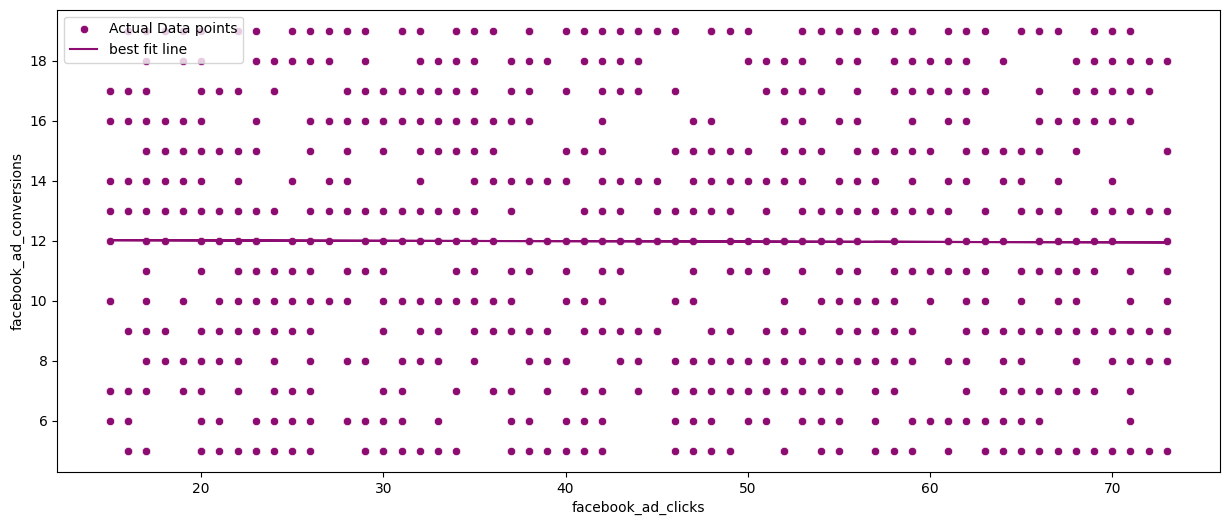

In [24]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#8c0c71', label='Actual Data points')
plt.plot(df['facebook_ad_clicks'], predictions,color='#8c0c71', label='best fit line')
plt.legend()
plt.show()

In [25]:
print("for the 50 clicks expected conversion is : ", round(reg_model.predict([[50]])[0][0],2))
print("for the 80 clicks expected conversion is : ", round(reg_model.predict([[80]])[0][0],2))

for the 50 clicks expected conversion is :  11.97
for the 80 clicks expected conversion is :  11.93


**R² Score Interpretation:** The R² score (2.5093318814728427e-05) is very low, meaning the model does not explain the variance in the data well. This suggests that facebook_ad_clicks may not be a strong predictor of facebook_ad_conversions.

**By the above regression model its confirm that the lead or the conversion is not alonly depends on click its depends on relevance, targeted customer, content, landing page experience, biding strategy and user behaviour.**

# Analyzing Facebook Campaign metrics Over time

In [26]:
df = df[['date_of_campaign', 'facebook_ad_campaign', 'facebook_ad_views',
       'facebook_ad_clicks', 'facebook_ad_conversions', 'facebook_cost_per_ad',
       'facebook_ctr', 'facebook_conversion_rate', 'facebook_cost_per_click']]
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95


### At what time of the month or days of the week do we observe the conersions?

In [27]:
# Extracting months and days from the date columns
df['month'] = df['date_of_campaign'].dt.month
df['week'] = df['date_of_campaign'].dt.weekday

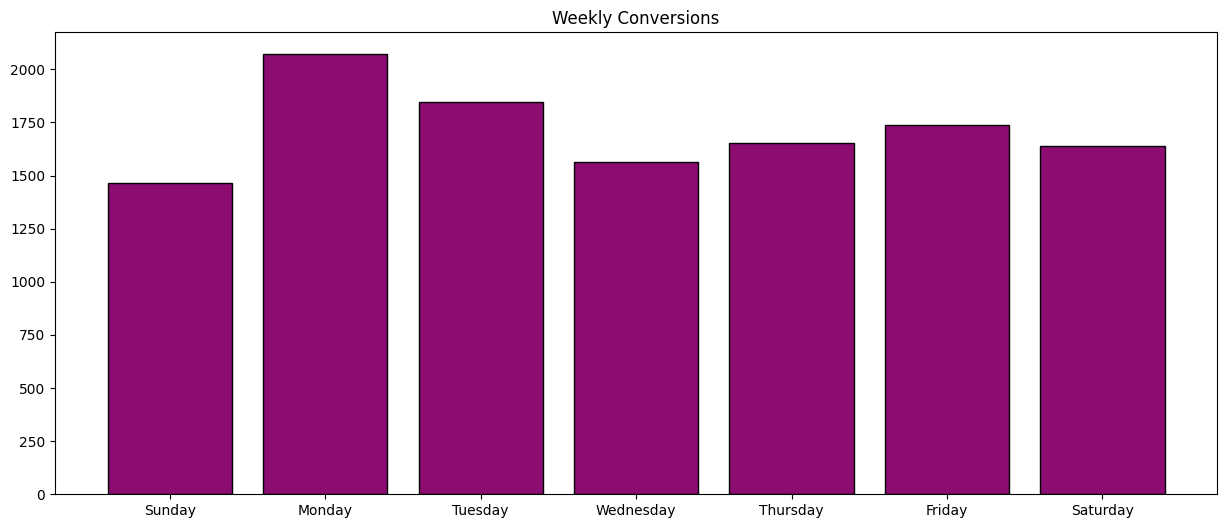

In [28]:
plt.figure(figsize=(15,6))
plt.title("Weekly Conversions")
weekly_conversions = df.groupby('week')[['facebook_ad_conversions']].sum()
week_names = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']
plt.bar(week_names,weekly_conversions['facebook_ad_conversions'], color="#8c0c71", edgecolor='k')
plt.show()

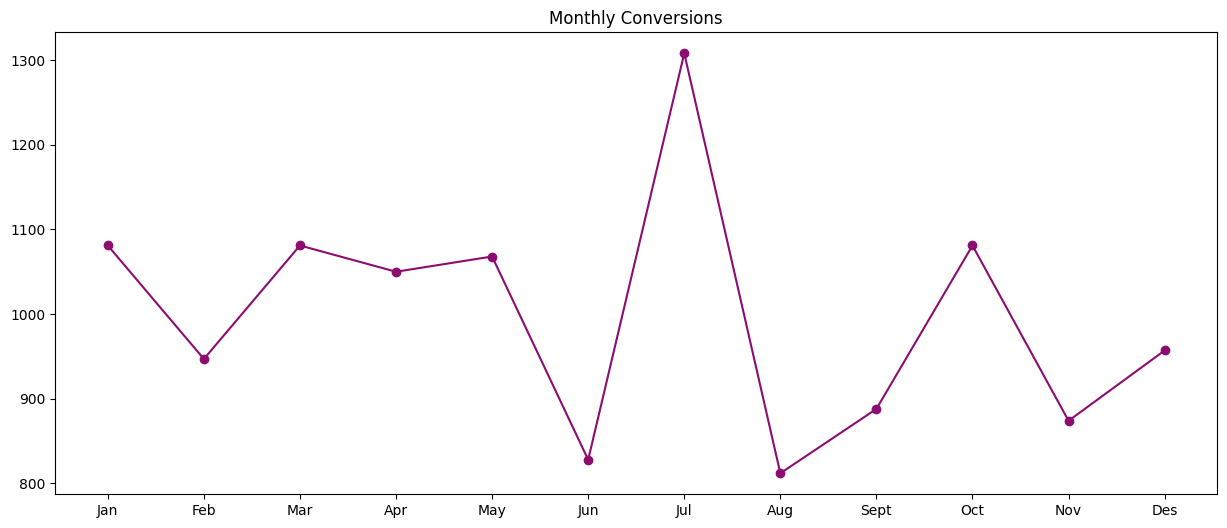

In [34]:
plt.figure(figsize=(15,6))
plt.title("Monthly Conversions")
monthly_conversions = df.groupby('month')[['facebook_ad_conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Des']
plt.plot(month_names, monthly_conversions['facebook_ad_conversions'],'-o',color="#8c0c71")
plt.show()

* Across the weekdays over a year, the total number of conversions remain relatively consistent, indicating the consistent level of engagement. Monday and Tuesday exhibit the higher conversion rate compared to other days, suggesting that the beginning of the workweek sees hoghtened user engagement or responsiveness to marketing efforts.

* Examining the monthly trend of conversions reveals an valtility, indicating there is no general increase or decrease in conversions over a time. However, certain months stand out with variation in conversion rate.February, June, Augest and November experience decline in conversion compared to neighbouring month.These periods of decrease conversion rates could be influnced by factors such as seasonal, fluctuations, change in consumer behavior or adjustment in marketing strategies.January,March, May,Jun,October and Descember experince hign increase in conversion rate.

### How does the cost per conversion(CPC) trend over time?

Cost per Conversion(CPC): This metrics is used to evaluate the cost effectivness and profitability of an online advertising campaign.This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

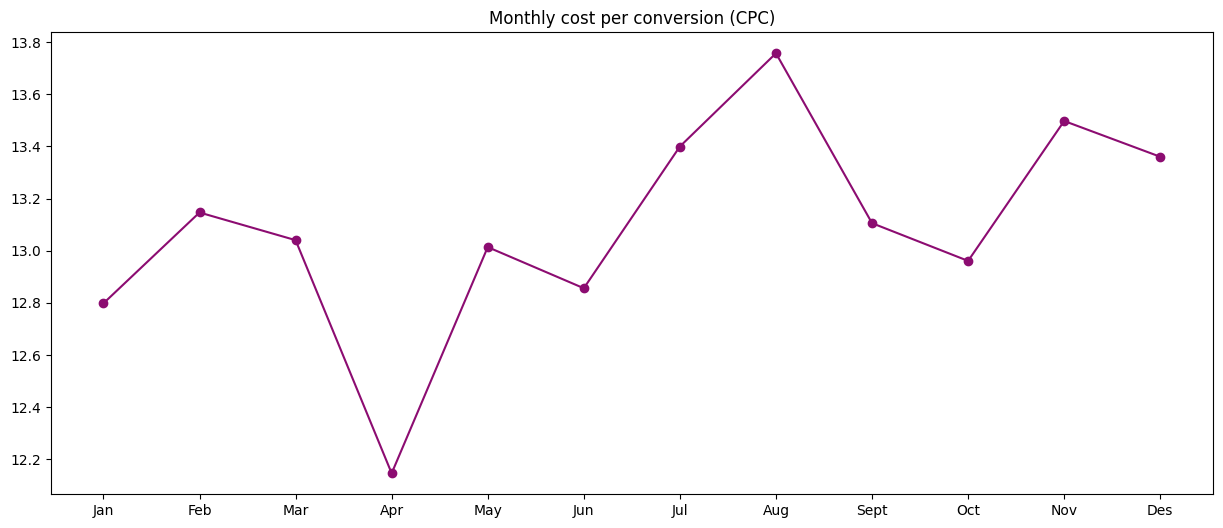

In [36]:
plt.figure(figsize=(15,6))
plt.title('Monthly cost per conversion (CPC)')
monthly_df = df.groupby('month')[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_df['cost_per_conversion'] = monthly_df['facebook_cost_per_ad']/monthly_df['facebook_ad_conversions']
plt.plot(month_names, monthly_df['cost_per_conversion'],'-o',color="#8c0c71")
plt.show()

* the CPC trend over 12 month period shows some fluctuations but overll maintain relatively stable range.

* Apri, Jun and October have the lowest CPC values, indicating potentially more cost effective advertising or higher conversion rates during this period.

* Augest has the highest CPC value indicating that advertising cost may be relatively higher during this months than the others.

* Lowest CPC value in certain months(eg. April and October) could indicate periods of higher advertising effectiveness or more favorable market conditions.

* Consider allocating  more advertising budgets to months with historically lower CPC values to maintain ROI.

### Is there long term equillibrium relationship between advertising spend and conversion rate that suggest stable, propotonal impact of budget changes on conversion over time?

In [38]:
score , p_value, _ = coint(df['facebook_cost_per_ad'],df['facebook_ad_conversions'])
print("Cointegration test score : ", score)
print("P-value: ", p_value)

if p_value < 0.05:
    print("P-Value is leass than significance value, Reject the Null Hypothesis")
else:
    print('P-Value is greater than significance value, Accept the null hypothesis')

Cointegration test score :  -31.71894313242047
P-value:  0.0
P-Value is leass than significance value, Reject the Null Hypothesis


* Since the P-value is 0  which is significantly lover than significance value, we reject the null hypothesis. this indicate that there is very strong long term equilibrium ralationship between advertising spend and conversion.

* Business can use this understanding of the stable relationship between cost and coversions to optimize there advertising strategies. By investing in campaigns that demonstrate a strong return on investment(ROI) and adjusting spending based on performance campaigns can maximize conversions while minimizing cost.